In [3]:
import matplotlib
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from pyDecision.algorithm import ahp_method

# AHP Method

In [4]:
df = pd.read_csv('datasets/filtered_dataset_gas.csv')

## Profiles Decision Matrix

In [5]:
def AHP(decision_matrix):
    #weights
    weights,rc = ahp_method(decision_matrix, wd = 'geometric')
    
    for i in range(0,weights.shape[0]):
        print ('feature '+str(i+1)+'): ',round(weights[i],3))
    
    #consistency ratio
    print('RC: ' + str(round(rc, 2)))
    if (rc > 0.1):
        print('The solution is inconsistent, pairwise comparison must be reviewed')
        return None
    print('The solution is consistent')
    return weights

### Profiles

In [6]:
#indexes crime, accidents, nature, attraction, duration, traffic, length and pollution
decision_matrix = [[1,3,7,7,5,1,1,3],          
                   [0.33,1,7,7,1,2,2,3],        
                   [0.14,0.14,1,2,0.2,0.2,0.14,0.5],
                   [0.14,0.14,0.5,1,0.14,0.2,0.11,0.2],
                   [0.2,1,5,7,1,0.33,1,3],
                   [1, 0.5, 5, 5, 3, 1, 1, 1],
                   [1,0.5, 7, 9, 1, 1, 1, 1],
                   [0.33, 0.33, 2, 5, 0.33, 1, 1, 1]]

decision_matrix_worker = [[1,0.33,3,3,0.14,0.14,0.11,3],
                          [3,1,3,3,0.14,0.14,0.14,3],
                          [0.33,0.33,1,1,0.11,0.11,0.11,0.33],
                          [0.33,0.33,1,1,0.11,0.11,0.11,0.33],
                          [7,7,9,9,1,2,0.5,9],
                          [7,7,9,9,0.5,1,0.5,9],
                          [9,7,9,9,2,2,1,9],
                          [0.33,0.33,3,3,0.14,0.11,0.11,1]]

decision_matrix_green = [[1,3,0.14,3,3,1,1,0.14],
                         [0.33,1,0.14,0.33,3,0.33,1,0.14],
                         [7,7,1,7,7,3,3,0.5],
                         [0.33,3,0.14,1,3,3,3,0.2],
                         [0.33,0.33,0.14,0.33,1,1,0.5,0.14],
                           [1,3,0.33,0.33,1,1,0.5,0.14],
                           [1,1,0.33,0.33,2,2,1,0.14],
                           [7,7,2,5,7,7,7,1]]

decision_matrix_safer = [[1,3,7,7,5,5,5,7],
                         [0.33,1,9,7,5,3,5,5],
                         [0.14,0.11,1,1,0.2,0.2,0.33,0.33],
                         [0.14,0.14,1,1,0.2,0.2,0.2,0.2],
                         [0.2,0.2,5,5,1,0.33,3,0.5],
                         [0.2,0.33,5,5,3,1,5,2],
                         [0.2,0.2,3,5,0.33,0.2,1,0.2],
                         [0.14,0.2,3,5,2,0.5,5,1]]

decision_matrix_tourist = [[1,3,2,0.2,3,3,3,3],
                          [0.33,1,0.5,0.2,3,3,3,2],
                          [0.5,2,1,0.2,3,3,4,1],
                          [5,5,5,1,5,5,7,5],
                          [0.33,0.33,0.33,0.2,1,1,2,3],
                          [0.33,0.33,0.33,0.2,1,1,2,0.25],
                          [0.33,0.33,0.25,0.14,0.5,0.5,1,0.33],
                          [0.33,0.5,1,0.2,0.33,4,3,1]]

In [7]:
print('Worker')
weights_w = AHP(decision_matrix_worker)
print('\nGreen')
weights_g = AHP(decision_matrix_green)
print('\nSafe')
weights_s = AHP(decision_matrix_safer)
print('\nTourist')
weights_t = AHP(decision_matrix_tourist)

Worker
feature 1):  0.044
feature 2):  0.06
feature 3):  0.021
feature 4):  0.021
feature 5):  0.268
feature 6):  0.225
feature 7):  0.329
feature 8):  0.032
RC: 0.07
The solution is consistent

Green
feature 1):  0.079
feature 2):  0.039
feature 3):  0.272
feature 4):  0.082
feature 5):  0.032
feature 6):  0.053
feature 7):  0.06
feature 8):  0.383
RC: 0.09
The solution is consistent

Safe
feature 1):  0.357
feature 2):  0.252
feature 3):  0.025
feature 4):  0.022
feature 5):  0.075
feature 6):  0.134
feature 7):  0.045
feature 8):  0.09
RC: 0.09
The solution is consistent

Tourist
feature 1):  0.166
feature 2):  0.1
feature 3):  0.12
feature 4):  0.398
feature 5):  0.063
feature 6):  0.046
feature 7):  0.034
feature 8):  0.072
RC: 0.08
The solution is consistent


In [8]:
print(weights_w)
print(weights_g)
print(weights_s)
print(weights_t)

[0.04408469 0.0598695  0.02083589 0.02083589 0.26789367 0.22527083
 0.32874792 0.0324616 ]
[0.07864944 0.03943284 0.27192161 0.08213207 0.03152021 0.05310667
 0.0600337  0.38320346]
[0.35730536 0.2516863  0.02470017 0.02246057 0.07519683 0.13372097
 0.04484505 0.09008475]
[0.16558382 0.10044379 0.11959862 0.39849638 0.06308121 0.04623835
 0.03409992 0.0724579 ]


### Greedy Profiles

In [9]:
decision_matrix_ldt = [[1,0.33,5], # worker
                       [3,1,7],
                       [0.2,0.14,1]]

decision_matrix_lpn = [[1,0.25,0.5], # green
                       [4,1,5],
                       [2,0.2,1]]

decision_matrix_lca = [[1,0.25,0.33], # safe
                       [4,1,3],
                       [3,0.33,1]]

decision_matrix_cna = [[1,5,0.33], # tourist
                          [0.2,1,0.14],
                          [3,7,1]]

In [10]:
print('Worker greedy')
weights_ldt = AHP(decision_matrix_ldt)
print('\nGreen greedy')
weights_lpn = AHP(decision_matrix_lpn)
print('\nSafe greedy')
weights_lca = AHP(decision_matrix_lca)
print('\nTourist greedy')
weights_cna = AHP(decision_matrix_cna)

Worker greedy
feature 1):  0.278
feature 2):  0.65
feature 3):  0.072
RC: 0.05
The solution is consistent

Green greedy
feature 1):  0.127
feature 2):  0.687
feature 3):  0.186
RC: 0.08
The solution is consistent

Safe greedy
feature 1):  0.117
feature 2):  0.615
feature 3):  0.268
RC: 0.06
The solution is consistent

Tourist greedy
feature 1):  0.278
feature 2):  0.072
feature 3):  0.65
RC: 0.05
The solution is consistent


In [11]:
print(weights_ldt)
print(weights_lpn)
print(weights_lca)
print(weights_cna)

[0.27841576 0.65003827 0.07154597]
[0.12654307 0.68698147 0.18647546]
[0.11697958 0.61520403 0.26781639]
[0.27841576 0.07154597 0.65003827]


# Routes and Means Computation

In [12]:
dfs = []
for i in range(600):
    x = df.loc[df['setID'] == i]
    if x.empty or x.isnull().values.any():
        continue
    x = x.reset_index()
    dfs.append(x)
print("Numbers of origin - destiny 2 pairs:",len(dfs))

Numbers of origin - destiny 2 pairs: 142


## Routes Evaluation
Routes evaluation for each distinct profile

In [13]:
def evaluate_routes(routes, weights_w, columns):
    routes_parameters = routes[columns[1:]]
    results_array = []
    result = 0
    for route in routes_parameters.iterrows():
        result = np.multiply(np.array(route[1]), np.array(weights_w))
        results_array.append(np.sum(result))
    #print(results_array)
    return results_array

#columns_ldt = ['ID', 'lengthNorm', 'durationNorm', 'trafficNorm']

#columns_lpn = ['ID', 'lengthNorm', 'polutionNorm', 'natureNorm']

#columns_lca = ['ID', 'lengthNorm', 'crimeNorm', 'accidentNorm']

#columns_cna = ['ID','crimeNormc','natureNorm','attractionNorm']

In [14]:
def evaluate_all(weight_list,dataframe_list,columns):
    result = []
    for i in weight_list:
        result.append([])
    
    for w in range(len(weight_list)):
        for df in dataframe_list:
            result[w].append(evaluate_routes(df,weight_list[w],columns))
    return result

In [15]:
columns = ['ID', 'crimeNorm', 'accidentNorm', 'natureNorm', 'attractionNorm', 'durationNorm',
           'trafficNorm', 'lengthNorm', 'polutionNorm']

weight_list = [weights_w,weights_g,weights_s,weights_t]
r = evaluate_all(weight_list,dfs,columns)

## Best Routes Attribution
Best routes attribution for each distinct profile

In [16]:
def Id_SetId(result_list,dataframe_list):
    id_list = []
    for i in result_list:
        id_list.append([])
    
    for result in range(len(result_list)):
        #for weight in result_list[result]:
        for weight in range(len(result_list[result])):
            
            max_value = max(result_list[result][weight])
            max_index = result_list[result][weight].index(max_value)
            df = dataframe_list[weight].loc[max_index]
            id_list[result].append([max_value,df['ID'],df['setID']])
    return id_list

In [17]:
id_list = Id_SetId(r,dfs)
id_list

[[[0.911415015854162, 31.0, 7.0],
  [0.7673205526631175, 175.0, 35.0],
  [0.6971912163498643, 245.0, 48.0],
  [0.8341977031545686, 294.0, 56.0],
  [0.6940237802718185, 318.0, 60.0],
  [0.9703542015543525, 347.0, 67.0],
  [0.8604125361164329, 418.0, 80.0],
  [0.8044127827741696, 424.0, 81.0],
  [0.7112704387581852, 428.0, 82.0],
  [0.6073162439066103, 464.0, 89.0],
  [0.5864803569662157, 486.0, 94.0],
  [0.8752099182080304, 505.0, 99.0],
  [0.7534094425163428, 511.0, 101.0],
  [0.6945826196549928, 538.0, 106.0],
  [0.7276348957941108, 626.0, 124.0],
  [0.8467819405309135, 651.0, 129.0],
  [0.5661524165194262, 720.0, 145.0],
  [0.8433910243158826, 738.0, 148.0],
  [0.7214316781670366, 741.0, 149.0],
  [0.9016494491611746, 794.0, 160.0],
  [0.6800592992180347, 831.0, 167.0],
  [0.7289870358120605, 860.0, 171.0],
  [0.837967962280229, 870.0, 173.0],
  [0.8061895975025835, 874.0, 174.0],
  [0.7536376957254287, 900.0, 178.0],
  [0.714905801696506, 945.0, 186.0],
  [0.8905277036414992, 1025.0

## Sum of Best Routes Evaluation
Mean of attributes computation from best evaluated routes 

In [18]:
def sum_all(id_list,dataframe_list,columns):
    
    means = []
    
    for i in range(len(id_list)):
        
        mean_df = pd.DataFrame(columns=columns)
        
        for j in range(len(dataframe_list)):
            #x = dfs[0].loc[dfs[0]['ID'] == id_list[0][0][1]]
            mean_df = pd.concat([mean_df,dataframe_list[j].loc[dataframe_list[j]['ID'] == id_list[i][j][1]]],join='inner')
        means.append(mean_df.mean())
        
    return means

In [19]:
columns = ["crimeNorm","accidentNorm","natureNorm","attractionNorm","durationNorm","trafficNorm","lengthNorm","crimes",
           "accidents","attractions","nature","traffic","duration","length","polution","polutionNorm"]

mean = sum_all(id_list,dfs,columns)
mean

C:\Users\Camilo\AppData\Local\Temp\ipykernel_14048\1114380104.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_df = pd.concat([mean_df,dataframe_list[j].loc[dataframe_list[j]['ID'] == id_list[i][j][1]]],join='inner')
C:\Users\Camilo\AppData\Local\Temp\ipykernel_14048\1114380104.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_df = pd.concat([mean_df,dataframe_list[j].loc[dataframe_list[j]['ID'] == id_list[i][j][1]]],join='inner')
C:\Users\Camilo\AppData\Local\Temp\ipykernel_140

[crimeNorm              0.727862
 accidentNorm           0.721773
 natureNorm             0.417598
 attractionNorm         0.381556
 durationNorm           0.912082
 trafficNorm            0.805906
 lengthNorm             0.820246
 crimes            585863.605634
 accidents            162.190141
 attractions            2.697183
 nature            589336.404982
 traffic                0.811305
 duration            2005.112676
 length             16745.676056
 polution              30.170224
 polutionNorm           0.481355
 dtype: float64,
 crimeNorm              0.700596
 accidentNorm           0.560485
 natureNorm             0.673149
 attractionNorm         0.481754
 durationNorm           0.555285
 trafficNorm            0.593742
 lengthNorm             0.432981
 crimes            592358.915493
 accidents            194.894366
 attractions            2.943662
 nature            695014.107161
 traffic                0.793378
 duration            2171.183099
 length             18797.

## Sum of Best Normalized Attributes
Mean of attributes computation from best normalized attributes 

In [20]:
def sum_greedy(dataframe_list,columns,norms):
    
    greedy_means = []
    
    for i in norms:
        
        mean_df = pd.DataFrame(columns=columns)
        
        for j in range(len(dataframe_list)):
            
            mean_df = pd.concat([mean_df, dataframe_list[j].loc[dataframe_list[j][i] == 1]],join='inner')
            
        greedy_means.append(mean_df.mean())
    
    return greedy_means

In [21]:
norms = ["crimeNorm","accidentNorm","natureNorm","attractionNorm","durationNorm","trafficNorm","lengthNorm","polutionNorm"]

columns = ["crimeNorm","accidentNorm","natureNorm","attractionNorm","durationNorm","trafficNorm","lengthNorm","crimes",
           "accidents","attractions","nature","traffic","duration","length","polution","polutionNorm"]

greedy_means = sum_greedy(dfs,columns,norms)
greedy_means

C:\Users\Camilo\AppData\Local\Temp\ipykernel_14048\3655908250.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_df = pd.concat([mean_df, dataframe_list[j].loc[dataframe_list[j][i] == 1]],join='inner')
C:\Users\Camilo\AppData\Local\Temp\ipykernel_14048\3655908250.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_df = pd.concat([mean_df, dataframe_list[j].loc[dataframe_list[j][i] == 1]],join='inner')
C:\Users\Camilo\AppData\Local\Temp\ipykernel_14048\3655908250.py:11: FutureWarning

[crimeNorm              1.000000
 accidentNorm           0.688474
 natureNorm             0.572430
 attractionNorm         0.341154
 durationNorm           0.710879
 trafficNorm            0.671025
 lengthNorm             0.510482
 crimes            507757.105634
 accidents            193.964789
 attractions            2.239437
 nature            646267.152146
 traffic                0.801743
 duration            2080.070423
 length             18511.760563
 polution              29.996792
 polutionNorm           0.515653
 dtype: float64,
 crimeNorm              0.702539
 accidentNorm           1.000000
 natureNorm             0.549384
 attractionNorm         0.434588
 durationNorm           0.633718
 trafficNorm            0.575143
 lengthNorm             0.594339
 crimes            602818.597315
 accidents            126.691275
 attractions            2.993289
 nature            685514.187950
 traffic                0.789698
 duration            2141.906040
 length             17270.

# PDFKS Evaluation

In [22]:
def PDFKS(dataframe_list,best_list,sum_name):
    
    best_list_values = []
    
    for i in range(len(sum_name)):
        best_list_values.append(best_list[i][sum_name[i]])
    
    result = []
    
    for i in range(len(dataframe_list)): # iterate over dataframe
        
        line = []
        
        for j in range(len(sum_name)): # iterate over raw data only len = 8

            df_value = dataframe_list[i][sum_name[j]]

            best_value = best_list_values[j]
            
            line.append((df_value-best_value)/best_value * 100)
            
        result.append(line)
    return result

In [23]:
sum_name = ['crimes','accidents','nature','attractions','duration','traffic','length','polution']

result = PDFKS(mean+greedy_means,greedy_means,sum_name)
print(len(result))

12


# PDFKS Heat Map Plot & Histogram

https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py

In [136]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.
    print(threshold)
    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            #kw.update(color=textcolors[int(im.norm(data[i, j]) <= (threshold * -1))])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [173]:

def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"), # Added a third color for values below the negative threshold
                     threshold_positive=None, threshold_negative=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters:
    - im: The AxesImage to be labeled.
    - data: Data used to annotate. If None, the image's data is used. Optional.
    - valfmt: The format of the data values. String or `matplotlib.ticker.StrMethodFormatter`.
    - textcolors: A tuple of text colors for different data ranges.
    - threshold_positive: Above this value, use the second text color. Optional.
    - threshold_negative: Below this value, use the third text color. Optional.
    - textkw: Additional keyword arguments to `text`.
    """

    if not isinstance(data, (list, matplotlib.numpy.ndarray)):
        data = im.get_array()

    # Normalize the positive and negative thresholds to the image's color range.
    norm = im.norm
    if threshold_positive is not None:
        threshold_positive = norm(threshold_positive)
    else:
        threshold_positive = norm(data.max())

    if threshold_negative is not None:
        threshold_negative = norm(threshold_negative)
    else:
        threshold_negative = -norm(data.min())
    print(threshold_positive,threshold_negative)
    # Set default text alignment to center, but allow it to be overwritten by textkw.
    kw = dict(horizontalalignment="center", verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            # Determine the color based on the data value.
            value = norm(data[i, j])
            
            if value >= threshold_positive:
                color = textcolors[1]  # Color for values above the positive threshold
                print(value,'maior')
            elif value <= threshold_negative:
                color = textcolors[1]  # Color for values below the negative threshold
                print(value,'menor')
            else:
                color = textcolors[0]  # Default color
            
            kw.update(color=color)
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

0.8591918625169462 -0.23541569588287467
0.8591918625169462 maior


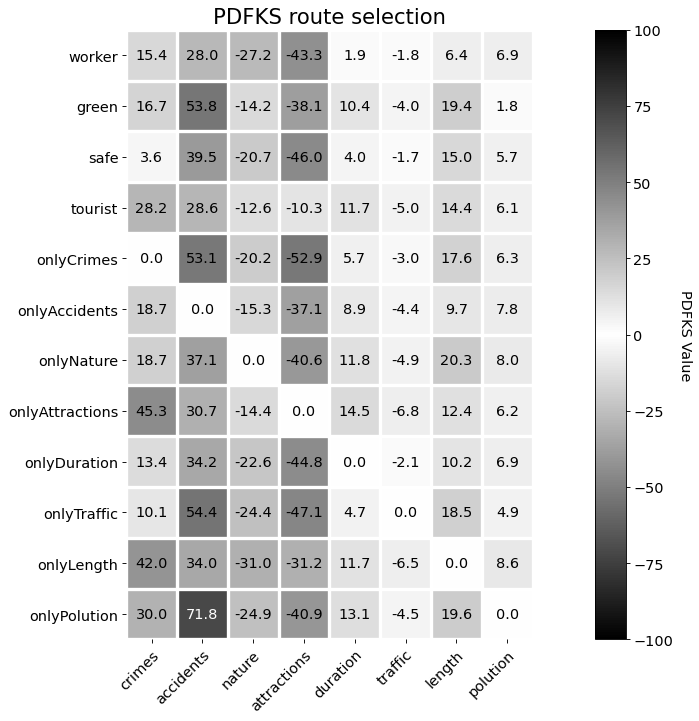

In [174]:
profiles = ['worker','green','safe','tourist','onlyCrimes','onlyAccidents','onlyNature','onlyAttractions',
            'onlyDuration','onlyTraffic','onlyLength','onlyPolution']

features = ['crimes','accidents','nature','attractions','duration','traffic','length','polution']

matplotlib.rcParams.update({'font.size': 13})

result_np = np.array(result)

from matplotlib.colors import LinearSegmentedColormap

# Define the colors for the colormap
colors = ['black', 'grey','white', 'grey','black']  # White, Gray, White

# Create a LinearSegmentedColormap object
cmap = LinearSegmentedColormap.from_list('white_gray_white', colors, N=256)
 

fig, ax = plt.subplots(figsize=(16,9),dpi=80)

im, cbar = heatmap(result_np, profiles, features, ax=ax,
                   cmap=cmap, cbarlabel="PDFKS Value",vmin=-100, vmax=100)
texts = annotate_heatmap(im, valfmt="{x:.1f}")

fig.tight_layout()
plt.title("PDFKS route selection", size=19)
plt.savefig("pdfks_route_selection_new.pdf",bbox_inches="tight")
plt.show()

In [26]:
result_sum = []
for i in result:
    res = 0
    for j in i:
        res += abs(j)
    result_sum.append(res)
    
x = list(zip(profiles,result_sum))

sorted_result = sorted(x,key=lambda x: int(x[1]))

profiles_names = []
values = []
for (i,j) in sorted_result:
    profiles_names.append(i)
    values.append(j)

#print(sorted_result)
#print(profiles_names)
#print(values)

In [27]:
import matplotlib.patches as mpatches

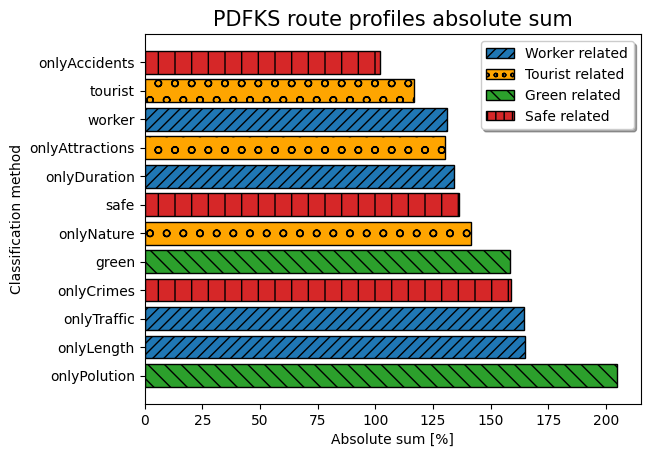

In [28]:
plt.rcdefaults()
fig, ax = plt.subplots()

blue = "tab:blue"
yellow = "orange"
green = "tab:green"
red = "tab:red"

colors = [red,yellow,blue,yellow,blue,red,yellow,green,red,blue,blue,green]
hatches = ['|','o','///','o','///','|','o','\\\\','|','///','///','\\\\']

ax.barh(profiles_names, values, align='center',color = colors)
ax.set_yticks(profiles_names, labels=profiles_names)

leg_g1 = mpatches.Patch(facecolor=blue,edgecolor='black',label="Worker related",hatch='///')
leg_g2 = mpatches.Patch(facecolor=yellow,edgecolor='black',label="Tourist related",hatch='oo')
leg_g3 = mpatches.Patch(facecolor=green,edgecolor='black',label="Green related",hatch='\\\\')
leg_g4 = mpatches.Patch(facecolor=red,edgecolor='black',label="Safe related",hatch='||')

plt.legend(loc="upper right",
           #bbox_to_anchor=(-0.45,1.08),
           ncol=1,
           fancybox=True,
           shadow=True,
           #fontsize="x-large",
           handles = [leg_g1,leg_g2,leg_g3,leg_g4])

for i, box in enumerate(ax.patches):
    box.set_hatch(hatches[i])
    fc = box.get_facecolor()
    box.set_edgecolor('black')
    box.set_facecolor(fc)

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Absolute sum [%]')
ax.set_ylabel('Classification method')
plt.title("PDFKS route profiles absolute sum", size=15)
plt.savefig("classification2.pdf",bbox_inches="tight")

plt.show()

In [29]:
features = ['crimes','accidents','nature','attractions','duration','traffic','length','polution']
profile = ['Worker', 'Green', 'Safe', 'Tourist']
best_values = [507757.105634,126.691275,809605.474893,4.756345,1967.288732,0.826151,15745.302817,28.212792]

def plot_average(profile,feature,best_value,y_label,title):
    fig, ax = plt.subplots()
    #value = 
    ax.bar(profile, value)
    ax.axhline(y = best_values, color = 'r', linestyle = '--', label = "Best Value")

    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend()

    plt.show()

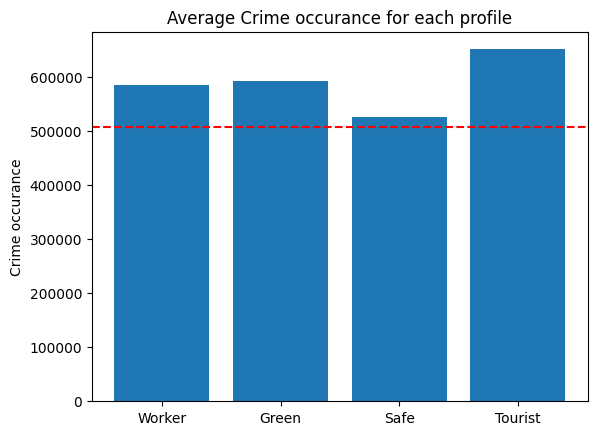

In [30]:
import matplotlib.pyplot as plt

#criminality
fig, ax = plt.subplots()

profile = ['Worker', 'Green', 'Safe', 'Tourist']
value = [585863.605634, 592358.915493, 526048.500000, 651023.119718]
#bar_labels = ['red', 'blue', '_red', 'orange']
#bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(profile, value)

ax.axhline(y = 507757.105634, color = 'r', linestyle = '--', label = "Best Value")
ax.set_ylabel('Crime occurance')
ax.set_title('Average Crime occurance for each profile')
#ax.legend(title='Fruit color')

plt.show()

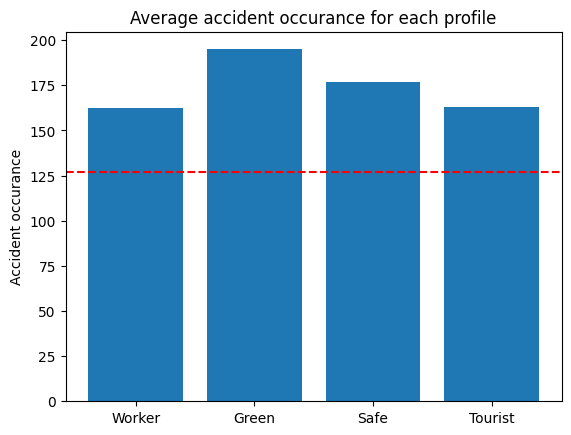

In [31]:
#nature
fig, ax = plt.subplots()

profile = ['Worker', 'Green', 'Safe', 'Tourist']
value = [162.190141, 194.894366, 176.767606, 162.936620]
#bar_labels = ['red', 'blue', '_red', 'orange']
#bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(profile, value)

ax.axhline(y = 126.691275, color = 'r', linestyle = '--', label = "Best Value")
ax.set_ylabel('Accident occurance')
ax.set_title('Average accident occurance for each profile')
#ax.legend(title='Fruit color')

plt.show()

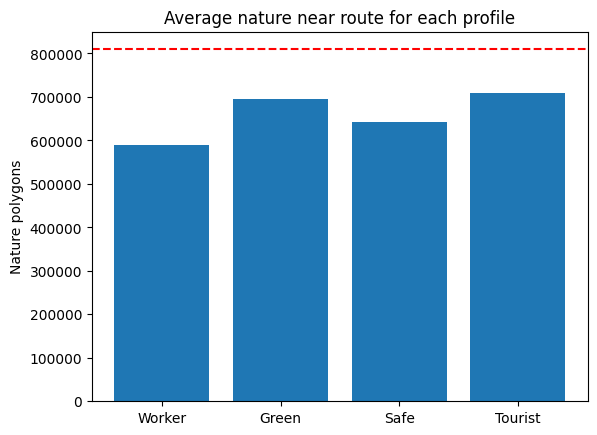

In [32]:
#nature
fig, ax = plt.subplots()

profile = ['Worker', 'Green', 'Safe', 'Tourist']
value = [589336.404982, 695014.107161, 642400.205705, 707922.364353]
#bar_labels = ['red', 'blue', '_red', 'orange']
#bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(profile, value)

ax.axhline(y = 809605.474893, color = 'r', linestyle = '--', label = "Best Value")
ax.set_ylabel('Nature polygons')
ax.set_title('Average nature near route for each profile')
#ax.legend(title='Fruit color')

plt.show()

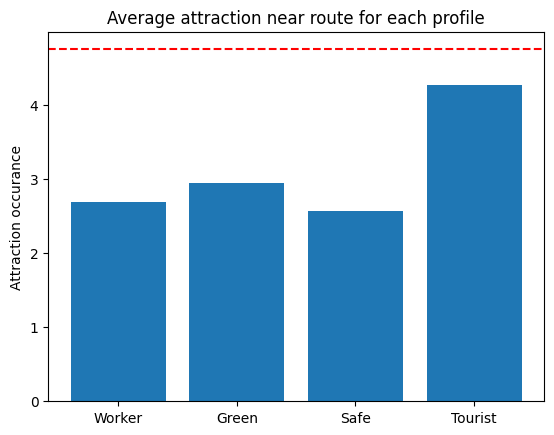

In [33]:
#attraction
fig, ax = plt.subplots()

profile = ['Worker', 'Green', 'Safe', 'Tourist']
value = [2.697183, 2.943662, 2.570423, 4.267606]
#bar_labels = ['red', 'blue', '_red', 'orange']
#bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(profile, value)

ax.axhline(y = 4.756345, color = 'r', linestyle = '--', label = "Best Value")
ax.set_ylabel('Attraction occurance')
ax.set_title('Average attraction near route for each profile')
#ax.legend(title='Fruit color')

plt.show()

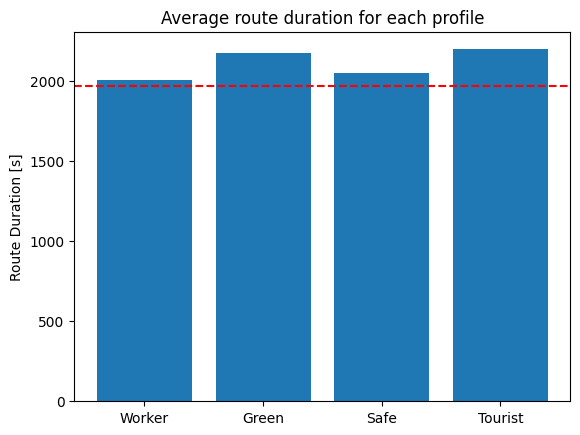

In [34]:
#duration
fig, ax = plt.subplots()

profile = ['Worker', 'Green', 'Safe', 'Tourist']
value = [2005.112676, 2171.183099, 2045.985915, 2196.485915]
#bar_labels = ['red', 'blue', '_red', 'orange']
#bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(profile, value)

ax.axhline(y = 1967.288732, color = 'r', linestyle = '--', label = "Best Value")
ax.set_ylabel('Route Duration [s]')
ax.set_title('Average route duration for each profile')
#ax.legend(title='Fruit color')

plt.show()

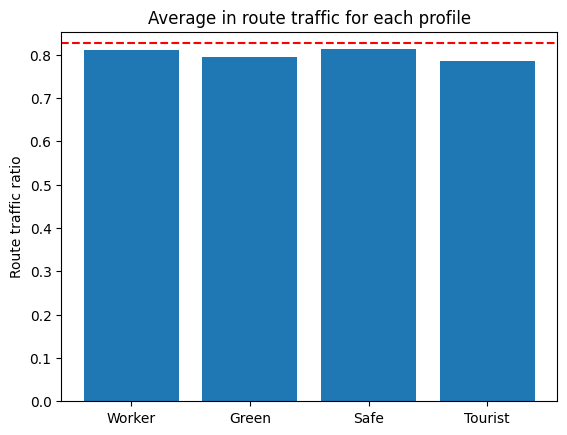

In [35]:
#traffic
fig, ax = plt.subplots()

profile = ['Worker', 'Green', 'Safe', 'Tourist']
value = [0.811305, 0.793378, 0.812130, 0.785144]
#bar_labels = ['red', 'blue', '_red', 'orange']
#bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(profile, value)

ax.axhline(y = 0.826151, color = 'r', linestyle = '--', label = "Best Value")
ax.set_ylabel('Route traffic ratio')
ax.set_title('Average in route traffic for each profile')
#ax.legend(title='Fruit color')

plt.show()

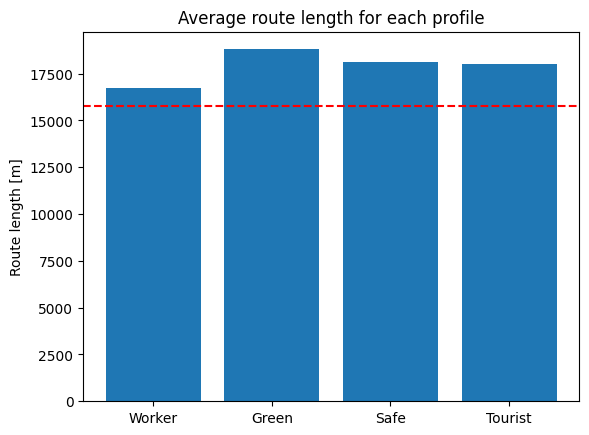

In [36]:
#length
fig, ax = plt.subplots()

profile = ['Worker', 'Green', 'Safe', 'Tourist']
value = [16745.676056, 18797.176056, 18112.697183, 18018.943662]
#bar_labels = ['red', 'blue', '_red', 'orange']
#bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(profile, value)

ax.axhline(y = 15745.302817, color = 'r', linestyle = '--', label = "Best Value")
ax.set_ylabel('Route length [m]')
ax.set_title('Average route length for each profile')
#ax.legend(title='Fruit color')

plt.show()

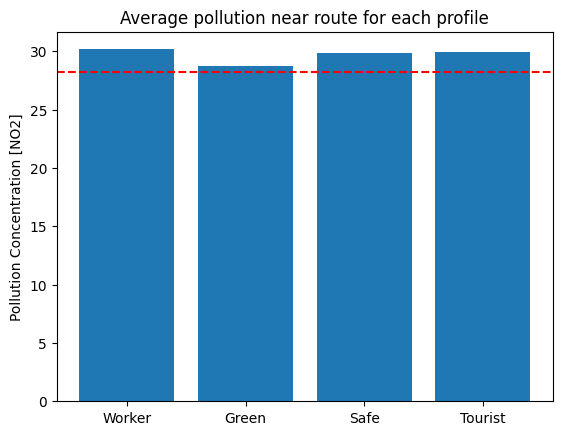

In [37]:
#pollution
fig, ax = plt.subplots()

profile = ['Worker', 'Green', 'Safe', 'Tourist']
value = [30.170224, 28.711952, 29.812157, 29.947077]
#bar_labels = ['red', 'blue', '_red', 'orange']
#bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(profile, value)

ax.axhline(y = 28.212792, color = 'r', linestyle = '--', label = "Best Value")
ax.set_ylabel('Pollution Concentration [NO2]')
ax.set_title('Average pollution near route for each profile')
#ax.legend(title='Fruit color')

plt.show()